<a href="https://colab.research.google.com/github/SvetLanchY/CompLing/blob/main/Tora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import os
import os.path 

import string
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

os.getcwd()
os.listdir()

!pip install pymystem3==0.1.10
!pip install pymorphy2[fast]

from pymorphy2 import MorphAnalyzer
from pymystem3 import Mystem
mystem = Mystem() 
morph = MorphAnalyzer()

In [ ]:
from google.colab import files #строка импорта
files.upload()

In [4]:
with open('torah_new_translation.txt', encoding = "utf-8") as f:
    data = f.read()

In [20]:
#def preprocessed ():
data1 = data.lower()
data2 = data1.translate(str.maketrans('','',string.punctuation))
data3 = re.sub(r'[\d+]', '', data2)
data4 = re.sub(r'[«,»,—,„, “]', ' ', data3)
data5 = re.sub(r'[\n+]', '', data4)
data6 = re.sub('   ', '', data5)
data7 = re.sub('  ', '', data6)
data8 = mystem.lemmatize(data7)
print(data8)   


['\ufeff', 'бытиеберешитва', ' ', 'начало', ' ', 'сотворение', ' ', 'бог', ' ', 'небо', ' ', 'и', ' ', 'земликогда', ' ', 'зем', ' ', 'ля', ' ', 'быть', ' ', 'безвидный', ' ', 'и', ' ', 'пустой', ' ', 'и', ' ', 'тьма', ' ', 'над', ' ', 'бездна', ' ', 'и', ' ', 'ветер', ' ', 'могучий', ' ', 'носиться', ' ', 'над', ' ', 'водамибог', ' ', 'сказалд', ' ', 'будетсвещать', ' ', 'становиться', ' ', 'свет', ' ', 'бог', ' ', 'видеть', ' ', 'что', ' ', 'свет', ' ', 'хороший', ' ', 'и', ' ', 'отделять', ' ', 'свет', ' ', 'от', ' ', 'тьма', ' ', 'бог', ' ', 'называть', ' ', 'свет', ' ', 'день', ' ', 'а', ' ', 'тьма', ' ', 'называть', ' ', 'ночьюпройти', ' ', 'вечер', ' ', 'затем', ' ', 'утро', ' ', 'день', ' ', 'одинбог', ' ', 'сказалд', ' ', 'быть', ' ', 'посреди', ' ', 'вода', ' ', 'свод', ' ', 'чтобы', ' ', 'отделять', ' ', 'вода', ' ', 'от', ' ', 'водыбог', ' ', 'создавать', ' ', 'свод', ' ', 'и', ' ', 'отделять', ' ', 'вода', ' ', 'который', ' ', 'под', ' ', 'свод', ' ', 'от', ' ', 'вода', ' 

In [21]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')


rustopwords = stopwords.words('russian')
rustopwords.extend(['—' , 'который', 'это', 'свой', 'весь', 'твой', 'ваш', 'наш', ' '])
data9 = [word for word in data8 if word not in rustopwords]
print(sorted(data9))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['\t', '\t', '\t', '\t ', '\n', ' \t', ' \t', ' \t', ' \t', ' \t', ' –\t', ' – ', ' – ', ' ‘', ' ‘', ' ‘', ' ’', ' ’', 'caudatus', 'caudatus', 'civis', 'dilectus', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'ii', 'ii', 'iiiпишет', 'illе', 'ischiadicusон', 'lobus', 'lobus', 'nervus', 'palaestina', 'peregrinus', 'pistacia', 'qtglev', 'rectissimus', 'sit', 'sive', 'sive', 'topa', 'topaбытиеберешитбог', 'topaбытиевайерастоят', 'topaбытиевайехихеттея', 'topaбытиевайецея', 'topaбытиевайешевгосподин', 'topaбытиелех', 'topaбытиемикеци', 'topaбытиеноахсыны', 'topaбытиетолдотне', 'topaв', 'topaвторозакониеваэтханани', 'topaвторозакониеки', 'topaвторозакониениццавимповедую', 'topaесли', 'topaзоваться', 'topaи', 'topaисход', 'topaисход', 'topaисходбешалахи', 'topaисходваэраи', 't

In [24]:
from nltk.probability import FreqDist
fdist = FreqDist(data9)
fdist.most_common(25)

[('господь', 1267),
 ('сказать', 848),
 ('земля', 791),
 ('бог', 750),
 ('сын', 609),
 ('народ', 582),
 ('моисей', 536),
 ('давать', 476),
 ('день', 452),
 ('сделать', 391),
 ('отец', 378),
 ('израиль', 336),
 ('жертва', 316),
 ('пусть', 309),
 ('взять', 293),
 ('должный', 285),
 ('человек', 282),
 ('ивр', 280),
 ('дом', 267),
 ('рука', 263),
 ('приносить', 260),
 ('аарон', 259),
 ('год', 250),
 ('имя', 248),
 ('господин', 230)]

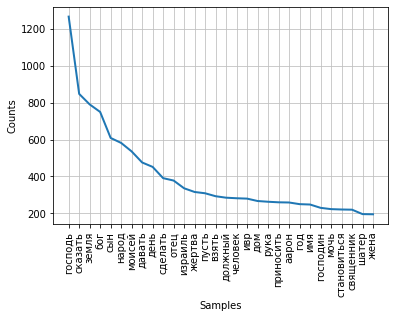

In [25]:
fdist.plot(30,cumulative=False)

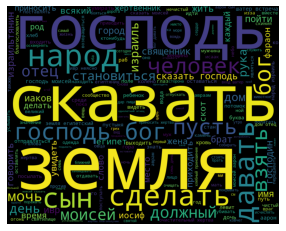

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

text_raw = " ".join(data9)
#wordcloud = WordCloud().generate(text_raw)

# wc = WordCloud().generate(text_raw)
# plt.axis("off")
# plt.imshow(wc)

wc = WordCloud(background_color="black", max_words=200, width=1000, height=800).generate(text_raw)# to recolour the image
plt.axis("off")
plt.imshow(wc)